#### Setup

In [1]:
import pandas as pd
from DAGHAR.readers import read_motionsense
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from experiments.main_functions.DFT import dataDFT
from experiments.main_functions.DHT import dataDHT
from experiments.main_functions.utils import to_categorical

def filtro_CAR(X, axis=0):
  return X - np.mean(X,axis=axis,keepdims=True)

#### MotionSense

##### Original Dataset

In [2]:
path = '/home/natalia/Git_Projects/PhD/DAGHAR/data/original/MotionSense/A_DeviceMotion_data/'
df = read_motionsense(path)
df #df['activity code'].unique()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,activity code,index,user,serial,csv
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,0,0,1,1,dws_1/sub_1.csv
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,0,1,1,1,dws_1/sub_1.csv
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,0,2,1,1,dws_1/sub_1.csv
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,0,3,1,1,dws_1/sub_1.csv
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,0,4,1,1,dws_1/sub_1.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,0.890518,-1.300928,0.089878,0.207249,0.963806,-0.167690,-0.920226,0.406762,-0.383194,0.044079,-0.204574,0.204906,4,4749,9,8,wlk_8/sub_9.csv
4750,0.929499,-1.319499,0.124063,0.199247,0.968591,-0.148750,-0.923594,0.231559,-0.521862,0.066348,-0.222604,0.225136,4,4750,9,8,wlk_8/sub_9.csv
4751,0.966103,-1.340284,0.159858,0.187951,0.973550,-0.129883,-0.970054,0.003083,-0.621238,-0.005959,-0.054040,0.240632,4,4751,9,8,wlk_8/sub_9.csv
4752,1.005158,-1.362495,0.201540,0.174576,0.978384,-0.110827,-1.005371,-0.108297,-0.708937,-0.007767,-0.003927,0.194735,4,4752,9,8,wlk_8/sub_9.csv


In [93]:
tst = df.loc[(df['activity code'] == 0) & (df.user==1) & (df.serial=='1')]

<Axes: >

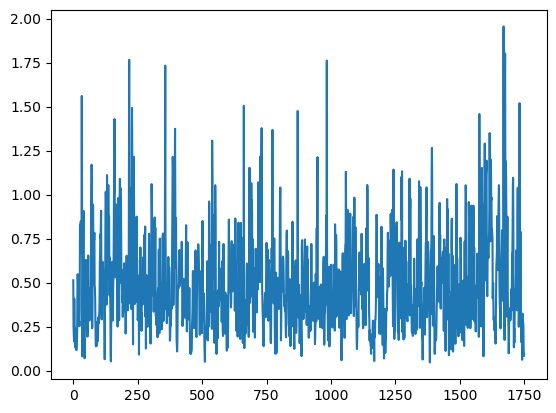

In [95]:
np.sqrt(tst['userAcceleration.y']**2 + tst['userAcceleration.x']**2 + tst['userAcceleration.z']**2).plot()

##### Standardized dataset

In [2]:
train = pd.read_csv('/home/natalia/Git_Projects/PhD/data/DAGHAR/MotionSense/train.csv')
test = pd.read_csv('/home/natalia/Git_Projects/PhD/data/DAGHAR/MotionSense/test.csv')
val = pd.read_csv('/home/natalia/Git_Projects/PhD/data/DAGHAR/MotionSense/validation.csv')
val

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gravity.z-58,gravity.z-59,serial,level_0,user,activity code,index,csv,window,standard activity code
0,-4.536825,3.697797,0.063958,-3.183749,-0.727725,1.341227,3.983603,0.991863,-0.065262,-0.178650,...,0.298916,0.303154,1,300,14,0,300,dws_1/sub_14.csv,5,4
1,-6.678264,-9.197556,-7.911867,-7.012595,-5.044684,-6.529391,-4.925936,-5.014435,-4.114904,-3.971769,...,0.183963,0.217402,1,0,10,0,0,dws_1/sub_10.csv,0,4
2,-3.400686,5.971896,5.588935,-7.198059,-2.953460,-0.750139,-3.025909,-1.256772,-0.139164,5.304766,...,-0.086036,-0.045203,2,660,10,0,660,dws_2/sub_10.csv,11,4
3,0.154636,6.738789,7.152540,-1.477663,-1.987749,-2.573263,-7.250015,-3.270904,2.275507,2.471060,...,0.010084,0.008305,1,240,10,0,240,dws_1/sub_10.csv,4,4
4,-6.895508,-2.837399,-0.990529,1.159973,-1.671011,5.314994,9.167741,-6.159916,-7.497341,-0.972841,...,-0.289848,-0.225407,2,960,10,0,960,dws_2/sub_10.csv,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,4.065250,-3.571242,-1.175903,0.134750,-0.225347,0.266435,-1.430967,-2.249669,0.402327,-2.899761,...,0.193298,0.170070,7,1980,14,4,1980,wlk_7/sub_14.csv,33,2
416,0.610553,-0.177584,-3.519669,-2.198643,1.082104,1.462016,-2.470503,-3.494372,5.021122,14.322193,...,0.009269,0.067561,8,240,10,4,240,wlk_8/sub_10.csv,4,2
417,-4.466574,6.081725,18.320400,2.382926,-5.010308,-2.472372,0.739261,-0.004682,-2.082558,-3.420432,...,-0.186384,-0.278783,7,420,10,4,420,wlk_7/sub_10.csv,7,2
418,-3.644330,-0.619775,-2.555405,8.111263,6.554451,-4.789246,-1.252271,2.638083,0.576275,0.592094,...,-0.105496,-0.210155,7,2220,14,4,2220,wlk_7/sub_14.csv,37,2


In [5]:
val.shape[0]

420

In [49]:
val.drop_duplicates("standard activity code")

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gravity.z-58,gravity.z-59,serial,level_0,user,activity code,index,csv,window,standard activity code
0,-4.536825,3.697797,0.063958,-3.183749,-0.727725,1.341227,3.983603,0.991863,-0.065262,-0.178650,...,0.298916,0.303154,1,300,14,0,300,dws_1/sub_14.csv,5,4
70,-6.229864,10.725931,8.790954,1.712203,-5.288841,-10.040668,-9.823387,0.031588,15.978567,4.505080,...,-0.282175,-0.243058,9,300,10,5,300,jog_9/sub_10.csv,5,5
140,0.025942,-0.036257,-0.006311,-0.016724,-0.010255,-0.035943,0.042386,0.039394,-0.019946,0.019518,...,-0.425273,-0.425340,13,900,10,2,900,sit_13/sub_10.csv,15,0
210,0.028660,-0.030631,0.051840,-0.012821,0.054874,0.051066,0.180523,-0.049462,0.017228,-0.009327,...,-0.006043,-0.005617,6,2220,10,3,2220,std_6/sub_10.csv,37,1
280,-0.662962,2.358364,-0.649231,-3.297542,-1.351992,-0.053266,2.239195,-1.117788,-4.255488,-4.046921,...,-0.064337,-0.024060,12,240,10,1,240,ups_12/sub_10.csv,4,3
350,-0.328877,-2.874903,5.508456,8.487873,-2.901518,-3.018239,-0.486723,-2.233656,-1.293167,-4.576742,...,-0.138874,-0.256788,8,1740,14,4,1740,wlk_8/sub_14.csv,29,2


In [3]:
att = ('accel', 'gyro')

filtered_train = [col for col in train.columns if col.startswith(att)]
train_attributes = train[filtered_train]
train_attributes

filtered_test = [col for col in test.columns if col.startswith(att)]
test_attributes = test[filtered_test]
test_attributes

filtered_val = [col for col in val.columns if col.startswith(att)]
val_attributes = val[filtered_val]

val_attributes

,accel-x-0,accel-x-1,accel-x-2,accel-x-3,accel-x-4,accel-x-5,accel-x-6,accel-x-7,accel-x-8,accel-x-9,...,gyro-z-50,gyro-z-51,gyro-z-52,gyro-z-53,gyro-z-54,gyro-z-55,gyro-z-56,gyro-z-57,gyro-z-58,gyro-z-59
0,-4.536825,3.697797,0.063958,-3.183749,-0.727725,1.341227,3.983603,0.991863,-0.065262,-0.178650,...,-0.372073,-2.300644,-2.196263,-1.489162,-1.057213,-0.669674,-0.321151,-0.234742,-1.078530,-1.261371
1,-6.678264,-9.197556,-7.911867,-7.012595,-5.044684,-6.529391,-4.925936,-5.014435,-4.114904,-3.971769,...,0.177351,-0.016467,0.010171,-0.012526,-0.301919,-0.606705,-0.870162,-1.053894,-0.848352,-0.605904
2,-3.400686,5.971896,5.588935,-7.198059,-2.953460,-0.750139,-3.025909,-1.256772,-0.139164,5.304766,...,3.224362,2.100363,0.465903,-0.888860,-1.893660,-2.413199,-2.338211,-1.267093,0.692992,-0.637109
3,0.154636,6.738789,7.152540,-1.477663,-1.987749,-2.573263,-7.250015,-3.270904,2.275507,2.471060,...,0.577977,1.406353,2.260556,0.364498,-0.241088,0.644637,-0.370384,-0.307766,0.388196,0.471573
4,-6.895508,-2.837399,-0.990529,1.159973,-1.671011,5.314994,9.167741,-6.159916,-7.497341,-0.972841,...,-0.758118,-0.548900,-0.470384,0.138149,0.312599,0.777035,1.568036,1.700228,2.277372,0.905884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,4.065250,-3.571242,-1.175903,0.134750,-0.225347,0.266435,-1.430967,-2.249669,0.402327,-2.899761,...,-0.381206,-0.824853,-0.443642,-0.418650,-1.254648,-1.345313,-0.559020,-0.414389,0.102416,-0.365721
416,0.610553,-0.177584,-3.519669,-2.198643,1.082104,1.462016,-2.470503,-3.494372,5.021122,14.322193,...,3.366141,1.988851,-3.860757,-5.109523,-2.349456,-1.323107,0.057239,0.173224,-0.143518,-0.884852
417,-4.466574,6.081725,18.320400,2.382926,-5.010308,-2.472372,0.739261,-0.004682,-2.082558,-3.420432,...,-0.992833,-0.561463,-0.059060,0.223156,0.687912,1.916784,1.080911,1.154143,4.133468,1.741226
418,-3.644330,-0.619775,-2.555405,8.111263,6.554451,-4.789246,-1.252271,2.638083,0.576275,0.592094,...,-0.695812,-0.322676,0.261211,-0.757285,-0.727469,0.151132,0.413551,1.554510,1.718132,1.066925


In [41]:
train_labels = train['standard activity code'].values
train_attributes_array = np.array(train_attributes).reshape(3558, 6, 60, 1)
train_attributes_array_CAR = filtro_CAR(train_attributes_array, axis=1)
train_dft_array = dataDHT(train_attributes_array)
train_dft_array_CAR = dataDHT(train_attributes_array_CAR)

test_labels = test['standard activity code'].values
test_attributes_array = np.array(test_attributes).reshape(1062, 6, 60, 1)
test_attributes_array_CAR = filtro_CAR(test_attributes_array, axis=1)
test_dft_array = dataDHT(test_attributes_array)
test_dft_array_CAR = dataDHT(test_attributes_array_CAR)

val_labels = val['standard activity code'].values
val_attributes_array = np.array(val_attributes).reshape(420, 6, 60, 1)
val_attributes_array_CAR = filtro_CAR(val_attributes_array, axis=1)
val_dft_array = dataDHT(val_attributes_array)
val_dft_array_CAR = dataDHT(val_attributes_array_CAR)

val_attributes_array.shape

(420, 6, 60, 1)

In [79]:
train['standard activity code'].values

array([4, 4, 4, ..., 2, 2, 2])

##### Plots

In [38]:
dic_labels = {0: 'sitting', 1: 'standing', 2: 'walking', 3: 'upstairs', 4: 'downstairs', 5: 'running'}
idx = 70 # Amostra da classe 4 - 0,70,140,210, 280, 350
#sampling_frequency = 50
#frequencies = jnp.fft.fftshift(jnp.fft.fftfreq(n=60, d=1/sampling_frequency))

# Exemplo de dados do acelerômetro
fig_subplots = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig_subplots.add_trace(go.Scatter(y=val_attributes_array[idx, 0, :, 0], mode='lines', name='accel-x'), row=1, col=1) #accel-x
fig_subplots.add_trace(go.Scatter(y=val_attributes_array[idx, 1, :, 0], mode='lines', name='accel-y'), row=2, col=1) #accel-y
fig_subplots.add_trace(go.Scatter(y=val_attributes_array[idx, 2, :, 0], mode='lines', name='accel-z'), row=3, col=1) #accel-z

fig_subplots.update_layout(title=dic_labels[val_labels[idx]])
fig_subplots.update_xaxes(title_text="Amostras no tempo", row=3, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=1, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=2, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=3, col=1)
fig_subplots.show()

# Exemplo de dados do giroscópio
fig_subplots = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig_subplots.add_trace(go.Scatter(y=val_attributes_array[idx, 3, :, 0], mode='lines', name='gyro-x'), row=1, col=1) #gyro-x
fig_subplots.add_trace(go.Scatter(y=val_attributes_array[idx, 4, :, 0], mode='lines', name='gyro-y'), row=2, col=1) #gyro-y
fig_subplots.add_trace(go.Scatter(y=val_attributes_array[idx, 5, :, 0], mode='lines', name='gyro-z'), row=3, col=1) #gyro-z

fig_subplots.update_layout(title=dic_labels[val_labels[idx]])
fig_subplots.update_xaxes(title_text="Amostras no tempo", row=3, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=1, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=2, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=3, col=1)
fig_subplots.show()

In [42]:
#Frequency before CAR

dic_labels = {0: 'sitting', 1: 'standing', 2: 'walking', 3: 'upstairs', 4: 'downstairs', 5: 'running'}
idx = 350 # Amostra da classe 4: 0, 5: 70, 0: 140, 1: 210, 3: 280, 2: 350
N=60
sampling_frequency = 20
frequencies = jnp.fft.fftshift(jnp.fft.fftfreq(n=N, d=1/sampling_frequency))

# Exemplo de dados do acelerômetro
fig_subplots = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig_subplots.add_trace(go.Scatter(x=frequencies, y=val_dft_array[idx, 0, :, 0]/N, mode='lines', name='accel-x'), row=1, col=1) #accel-x
fig_subplots.add_trace(go.Scatter(x=frequencies, y=val_dft_array[idx, 1, :, 0]/N, mode='lines', name='accel-y'), row=2, col=1) #accel-y
fig_subplots.add_trace(go.Scatter(x=frequencies, y=val_dft_array[idx, 2, :, 0]/N, mode='lines', name='accel-z'), row=3, col=1) #accel-z

fig_subplots.update_layout(title=dic_labels[val_labels[idx]])
fig_subplots.update_xaxes(title_text="Amostras na frequência", row=3, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=1, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=2, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=3, col=1)
fig_subplots.show()

# Exemplo de dados do giroscópio
fig_subplots = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig_subplots.add_trace(go.Scatter(x=frequencies, y=val_dft_array[idx, 3, :, 0]/N, mode='lines', name='gyro-x'), row=1, col=1) #gyro-x
fig_subplots.add_trace(go.Scatter(x=frequencies, y=val_dft_array[idx, 4, :, 0]/N, mode='lines', name='gyro-y'), row=2, col=1) #gyro-y
fig_subplots.add_trace(go.Scatter(x=frequencies, y=val_dft_array[idx, 5, :, 0]/N, mode='lines', name='gyro-z'), row=3, col=1) #gyro-z

fig_subplots.update_layout(title=dic_labels[val_labels[idx]])
fig_subplots.update_xaxes(title_text="Amostras na frequência", row=3, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=1, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=2, col=1)
fig_subplots.update_yaxes(title_text="Escala", row=3, col=1)
fig_subplots.show()